In [14]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # Convolution Layers
from keras.layers import Dense, Dropout, Flatten # Core Layers

from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from IPython.display import clear_output

import numpy as np
import seaborn as sns
from PIL import Image
import os
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

5


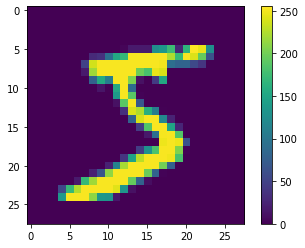

In [16]:
prevnum = 0
print(train_labels[prevnum])
plt.imshow(train_images[prevnum])
plt.colorbar()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
model = Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/2
938/938 [==============================] - 51s 53ms/step - loss: 0.0841 - accuracy: 0.9738 - val_loss: 0.0838 - val_accuracy: 0.9752
Epoch 2/2
938/938 [==============================] - 18s 19ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0291 - val_accuracy: 0.9912


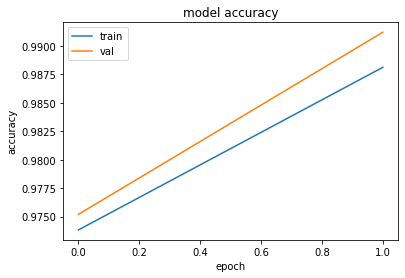

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
model.save('mnist-model.h5')

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0291 - accuracy: 0.9912
Test accuracy: 0.9911999702453613


In [24]:
predictions = model.predict(test_images, verbose=0)

prednum = 0 # predict index

print(f'Expected: {test_labels[prednum]}')
print(f'Predicted: {np.argmax(predictions[prednum])}')

Expected: 7
Predicted: 7


In [25]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([0,1,2,3,4,5,6,7,8,9])
  plot = plt.bar(range(10), predictions_array, color="#777777", align="center")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  plot[predicted_label].set_color('orange')

In [27]:
# Custom Image

img = '/content/nine.png'

image = cv.imread(img, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image / 255
image = image.reshape((1, 28, 28))

plt.imshow(image.reshape(28, 28))
plt.colorbar()

predictions = model.predict(image, verbose=0)

plt.xlabel(f"Predicted: {np.argmax(predictions)}")

plt.show()

plot_value_array(0, predictions, test_labels)

error: ignored

# Gradio

In [28]:
!pip install gradio

     |████████████████████████████████| 871 kB 4.3 MB/s 
     |████████████████████████████████| 210 kB 48.5 MB/s 
     |████████████████████████████████| 52 kB 941 kB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 50.0 MB/s 
     |████████████████████████████████| 271 kB 53.2 MB/s 
     |████████████████████████████████| 10.9 MB 33.7 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 61 kB 509 kB/s 
     |████████████████████████████████| 856 kB 50.1 MB/s 
     |████████████████████████████████| 3.6 MB 33.9 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=ca9e

In [29]:
import tensorflow as tf
import numpy as np
from urllib.request import urlretrieve
import gradio as gr

model = tf.keras.models.load_model("mnist-model.h5")

def recognize_digit(image):
    image = cv.resize(image, (28, 28))
    image = image / 255
    image = image.reshape((1, 28, 28))
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

gr.Interface(fn=recognize_digit, 
             inputs="sketchpad", 
             outputs=gr.outputs.Label(num_top_classes=3),
             live=True,
             css=".footer {display:none !important}",
             # title="MNIST Sketchpad",
             description="Draw a number 0 through 9 on the sketchpad, and see predictions in real time.",
             thumbnail="https://raw.githubusercontent.com/gradio-app/real-time-mnist/master/thumbnail2.png").launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://46805.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
